# Tire Cornering Comparison

In [36]:
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import copy

import sys
import data_helpers
#sys.path.append("/")


In [37]:
run_numbers = [15, 16, 18, 19, 21, 22]
file_name = "tire_data/raw_data/RawData_Cornering_Matlab_SI_10inch_Round8/B1965raw{0}.mat"
   
datas = [sio.loadmat(file_name.format(str(run_num))) for run_num in run_numbers]

df = data_helpers.import_datas(datas)

In [38]:
variable_sweeps = {"load" : {"sweep" : np.array([-250, -200, -150, -100, -50]) / 0.224809, "label" : "FZ" },
                    "camber" : {"sweep" : np.array([0, 2, 4]), "label" : "IA"},
                    "pressure" : {"sweep" : np.array([8, 10, 12, 14]) * 6.89476, "label" : "P"},
                    "velocity" : {"sweep" : np.array([15, 25, 45]) * 1.60934, "label" : "V"}}

for variable, info in variable_sweeps.items():
    temp_nearest_func = lambda x: data_helpers.get_nearest_value(info["sweep"], x)
    df[variable] = df[info["label"]].apply(temp_nearest_func)

In [39]:
subsets_to_compare = []
for run_num in run_numbers:
    subsets_to_compare.append(df[(df["RUN"] == run_num) & (df["velocity"] == 40.2335) & (df["pressure"] == 68.9476)])

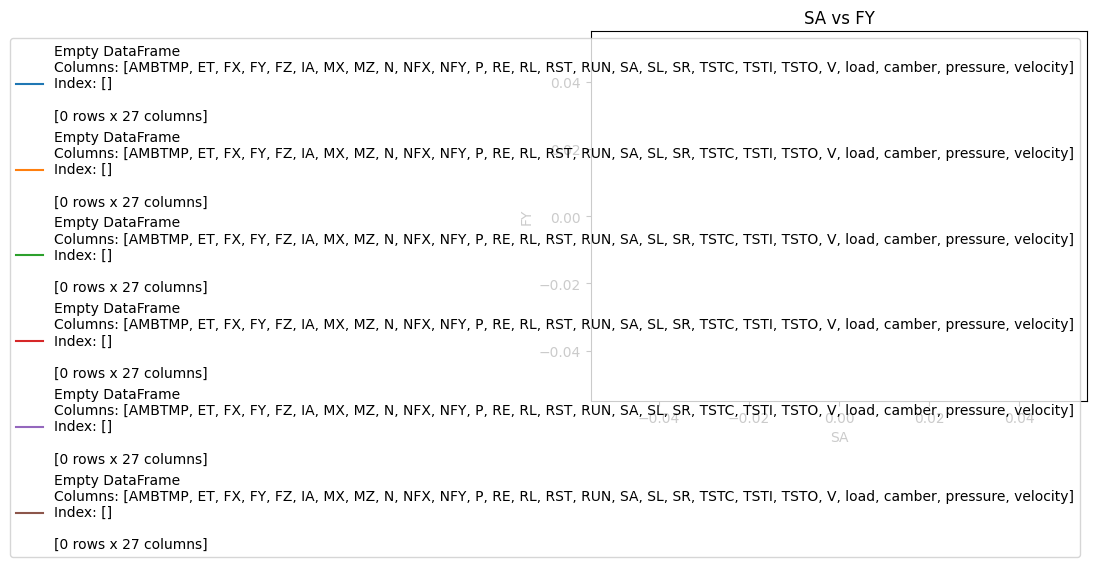

In [40]:
for x in subsets_to_compare:
    plt.plot(x["SA"], x["FY"], label = x)
plt.legend()
plt.xlabel("SA")
plt.ylabel("FY")
plt.title("SA vs FY")
plt.show()